In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df_test_half=pd.read_csv("test_data.txt",sep=":::",engine='python',names=['sno','movie_name','plot'])
df_train_copy=pd.read_csv("train_data.txt",sep=":::",engine='python',names=['sno','movie_name','genre','plot'])
df_sol=pd.read_csv("test_data_solution.txt",sep=":::",engine='python',names=['sno','movie_name','genre','plot'])



In [3]:
df_test=pd.merge(df_test_half,df_sol[['movie_name','genre']],on='movie_name',how='left')


In [4]:
df_test.head()

,sno,movie_name,plot,genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


In [5]:
df_train=df_train_copy.iloc[:54200].copy()

In [6]:
df_train.head()

,sno,movie_name,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
df_test.head()

,sno,movie_name,plot,genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


In [8]:
df_sol.head()

,sno,movie_name,genre,plot
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [9]:
df_train.shape,df_test.shape,df_sol.shape

((54200, 4), (54200, 4), (54200, 4))

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sno         54200 non-null  int64 
 1   movie_name  54200 non-null  object
 2   genre       54200 non-null  object
 3   plot        54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
df_train.describe()

,sno
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [12]:
df_train.loc[df_train['plot'].str.contains(r'http\s+',na=False)]


,sno,movie_name,genre,plot


In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
import string
import re
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
stop_words=set(stopwords.words('english'))

In [16]:
def clear(text):
    text=text.lower()
    text =re.sub(r'\s+@\s+','',text)
    text=re.sub(r'http\s+','',text)
    text=re.sub(f'[{string.punctuation}]','',text)
    text=re.sub(f'[{string.digits}]','',text)
    text=re.sub(r'\s+[a-zA-Z]\s+','',text)
    words=nltk.tokenize.word_tokenize(text)
    text=" ".join([word for word in words if word not in stop_words and len(word)>2])

    return text.strip()
    

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:

print(clear(df_train['plot'][0]))

listening toconversation doctor parents yearold oscar learns nobody courage tell hasfew weeks live furious refuses speak anyone except straighttalking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences asprofessional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue


In [19]:
df_train['processed_plot']=df_train['plot'].apply(clear)
df_test['processed_plot']=df_test['plot'].apply(clear)

In [20]:
df_train['input']=df_train['movie_name']+" "+df_train['processed_plot']
df_test['input']=df_test['movie_name']+" "+df_test['processed_plot']
all_text=pd.concat([df_train['input'],df_test['input']])
all_text.shape

(108400,)

In [21]:
all_text.head()

0     Oscar et la dame rose (2009)  listening tocon...
1     Cupid (1997)  brother sister withpast incestu...
2     Young, Wild and Wonderful (1980)  bus empties...
3     The Secret Sin (1915)  help unemployed father...
4     The Unrecovered (2007)  films title refers un...
Name: input, dtype: object

In [22]:
length=(df_train['plot'].apply(lambda x:len(str(x)))).mean()
cleared_length=(df_train['processed_plot'].apply(lambda x:len(str(x)))).mean()

In [23]:
print("before:", length, ' ', "after:",cleared_length)

before: 600.4387638376384   after: 414.6292435424354


In [24]:
import matplotlib.pyplot as plt

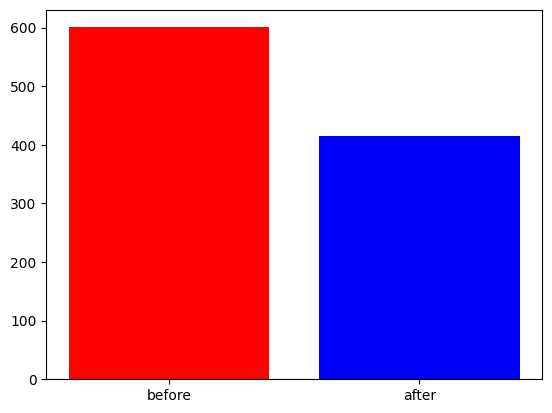

In [25]:
values=[length,cleared_length]
labels=['before','after']

plt.bar(labels,values, color=['red','blue'])
plt.show()

In [26]:
df_train['processed_plot']=df_train['processed_plot'].apply(lambda x: x[:np.random.randint(250,2000)]if len(x)>2000 else x)

In [27]:
df_train['processed_plot'][0]

'listening toconversation doctor parents yearold oscar learns nobody courage tell hasfew weeks live furious refuses speak anyone except straighttalking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences asprofessional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

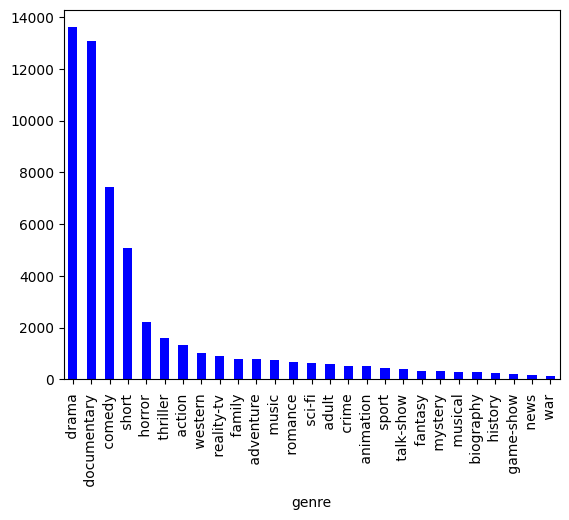

In [28]:
label_info=df_train['genre'].value_counts()
label_info.plot(kind='bar',color="blue")
plt.show()

In [29]:
df_train.head()

,sno,movie_name,genre,plot,processed_plot,input
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening toconversation doctor parents yearol...,Oscar et la dame rose (2009) listening tocon...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister withpast incestuous relationshi...,Cupid (1997) brother sister withpast incestu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,"Young, Wild and Wonderful (1980) bus empties..."
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,The Secret Sin (1915) help unemployed father...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,The Unrecovered (2007) films title refers un...


In [30]:
df_train.drop(columns=['plot'],inplace=True)

In [31]:
df_test.drop(columns=['plot'],inplace=True)

In [32]:
df_train['input']=df_train['movie_name']+" "+df_train['processed_plot']
df_test['input']=df_test['movie_name']+" "+df_test['processed_plot']

In [33]:
df_train.sample()

,sno,movie_name,genre,processed_plot,input
35797,35798,Union Square (2003),documentary,union square ispowerful look world homeless he...,Union Square (2003) union square ispowerful ...


In [34]:
all_text=pd.concat([df_train['input'],df_test['input']])

In [35]:
all_text.shape

(108400,)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [37]:
tfidf=TfidfVectorizer(max_features=35000, ngram_range=(1,2))
tfidf.fit(all_text)

x_train_vec=tfidf.transform(df_train['input'])
x_test_vec=tfidf.transform(df_test['input'])

In [38]:
encoder=LabelEncoder()
y_train_enc=encoder.fit_transform(df_train['genre'])
y_test_enc=encoder.fit_transform(df_test['genre'])

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
sample= RandomOverSampler(random_state=42)
x_train_resampled,y_train_resampled=sample.fit_resample(x_train_vec,y_train_enc)


In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [57]:
mnb=MultinomialNB()
lg=LogisticRegression(solver='sag', max_iter=500,random_state=42)
svc=LinearSVC()

In [58]:
lg.fit(x_train_resampled,y_train_resampled)
#svc.fit(x_train_resampled,y_train_resampled)
#mnb.fit(x_train_resampled,y_train_resampled)

LogisticRegression(max_iter=500, random_state=42, solver='sag')

In [67]:
#ypredict_test_lg=lg.predict(x_test_vec)
#ypredict_train_lg=lg.predict(x_train_resampled)

ypredict_test_mnb=lg.predict(x_test_vec)
ypredict_train_mnb=lg.predict(x_train_resampled)

#ypredict_test_svc=svc.predict(x_test_vec)
#ypredict_train_svc=svc.predict(x_train_resampled)

##print("logistic regression:")
#print("train accuracy:",accuracy_score(y_train_resampled,ypredict_train_lg)," ","test accuracy:",accuracy_score(y_test_enc,ypredict_test_lg))


In [65]:
print("SVM:")
print("train accuracy:",accuracy_score(y_train_resampled,ypredict_train_svc)," ","test accuracy:",accuracy_score(y_test_enc,ypredict_test_svc))


SVM:
train accuracy: 0.9948951964233722   test accuracy: 0.5447601476014761


In [66]:
print("Logistic Regression:")
print("train accuracy:",accuracy_score(y_train_resampled,ypredict_train_lg)," ","test accuracy:",accuracy_score(y_test_enc,ypredict_test_lg))


Logistic Regression:
train accuracy: 0.9713548682030058   test accuracy: 0.5694464944649447


In [68]:
print("Naive_bayes:")
print("train accuracy:",accuracy_score(y_train_resampled,ypredict_train_mnb)," ","test accuracy:",accuracy_score(y_test_enc,ypredict_test_mnb))

Naive_bayes:
train accuracy: 0.9713548682030058   test accuracy: 0.5694464944649447
